<a href="https://colab.research.google.com/github/lkolebka/Connect-four/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
! pip uninstall tweepy

Found existing installation: tweepy 3.10.0
Uninstalling tweepy-3.10.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/tweepy-3.10.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tweepy/*
Proceed (y/n)? y
  Successfully uninstalled tweepy-3.10.0


In [5]:
import re 
import numpy as np 
import tweepy
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
!pip install better-profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from better_profanity import profanity

In [1]:
exit ()


In [6]:
#Definining the access token for the App

consumer_key = 'KCpJyBbUTZ9QSPHIVCDNDfDLw'
consumer_secret = 'nxr7WjbRMaUCxRLcwR3cCr7Oc5snqExkmn61vMh3of64vCECWf' 
access_token = '1533845404974030850-2Q0V4eh2qJVFwsChRHa8WVx1yBRAZi'
access_token_secret = 'LfJOOydw6Xq1csfaaMND9mNLmI2njtl8rbgr8vR8bTtmj'

In [7]:
# Access Twitter Data

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [114]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: Elon Musk


In [115]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [116]:
# raw Tweets list
tweet_list

["@bweezybird No, he's leaving because Elon Musk.",
 'Elon Musk declare himself to be the Chief $TWIT.\n\n📕 #Dextools https://t.co/uM6JG3oRCB\n\n$BABYDOGE $ADA $QNT $FTM \n\n🥓… https://t.co/gLmv7JB7bS',
 '@bessbell Any dummy can see that this was not from Elon musk! 🤬',
 'Pay Up Blue Checks: Elon Musk Plans to Charge $20 a Month for Twitter Verification https://t.co/AtLfvp14jz via @BreitbartNews',
 'Technically, Elon, you are the CEO. Unless you decide to hire someone that you can trust to take that position. \n\nhttps://t.co/LoAtoJHmV9',
 'ELON MUSK HAS ALREADY PROVEN HE BOUGHT THIS PLATFORM TO CONTROL THE NARRATIVE OF DEMOCRATS ON THIS SITE\nSUGGEST A M… https://t.co/2rZi8950DY',
 '@drshamamohd Elon musk will not favor u.',
 '@ScottNover You seriously think you’re smarter than Elon Musk? 😂',
 '@DSnyder28 @LayahHeilpern I can say the same thing about a Tesla. It’s created by particles that were created in st… https://t.co/1sEgZ5iSyX',
 '@alokagrawal @TechTimBrown @GergelyOrosz Being f

In [117]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [118]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['no hes leaving because elon musk',
 'elon musk declare himself be chief twit babydoge ada qnt ftm',
 'any can see that this was not elon musk',
 'pay up blue checks elon musk plans charge 20 month twitter verification via',
 'technically elon you are ceo unless you decide hire someone that you can trust take that position',
 'elon musk has already proven he bought this platform control narrative democrats this site suggest m',
 'elon musk will not favor u',
 'you seriously think you re smarter than elon musk',
 'i can say same thing about tesla it s created by particles that were created st',
 'being forced work weekend is toxic firing people cause wi',
 'hmm use money heating buying food or line elon musks pockets nonsense tick that means absolutely fuc',
 'consequences will haunt elon musk if twitter flounts law npr',
 'it s unlikely musk knows about this hill said reference water is so specific that this clearly is mes',
 'if elon musk takes over twitter brings donald trump back i

In [119]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("no hes leaving because elon musk"))

In [120]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]

# Print all the sentiment values

sentiment_values[0:99]

[[0.0, 'no hes leaving because elon musk'],
 [0.0, 'elon musk declare himself be chief twit babydoge ada qnt ftm'],
 [0.0, 'any can see that this was not elon musk'],
 [0.0,
  'pay up blue checks elon musk plans charge 20 month twitter verification via'],
 [0.0,
  'technically elon you are ceo unless you decide hire someone that you can trust take that position'],
 [0.0,
  'elon musk has already proven he bought this platform control narrative democrats this site suggest m'],
 [0.0, 'elon musk will not favor u'],
 [-0.3333333333333333, 'you seriously think you re smarter than elon musk'],
 [0.0,
  'i can say same thing about tesla it s created by particles that were created st'],
 [-0.30000000000000004,
  'being forced work weekend is toxic firing people cause wi'],
 [0.2,
  'hmm use money heating buying food or line elon musks pockets nonsense tick that means absolutely fuc'],
 [0.0, 'consequences will haunt elon musk if twitter flounts law npr'],
 [-0.13333333333333333,
  'it s unlik

In [121]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.0,no hes leaving because elon musk
1,0.0,elon musk declare himself be chief twit babydo...
2,0.0,any can see that this was not elon musk
3,0.0,pay up blue checks elon musk plans charge 20 m...
4,0.0,technically elon you are ceo unless you decide...
...,...,...
95,0.0,sounds like something elon musk kanye west wou...
96,0.5,can elon musk make twitter better
97,0.0,schools
98,0.2,elon musk has brought free speech back all ame...


In [122]:
#Custom  : create a dataframe of each tweet against its polarity and add the Result of the popularity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet",])


# Generate result using pandas
result = []
for value in sentiment_df["polarity"]:
    if value > 0:
        result.append("Positive")
    elif value < 0 : 
        result.append("Negative")
    else:
        result.append("Neutral")
      
sentiment_df["Result"] = result  
print(sentiment_df)

#specify the name of the file 
nameFile = "twitter.csv" 

#encoding of the file
sentiment_df.to_csv(nameFile, sep='\t', encoding='utf-8')

#download the file 
from google.colab import files
files.download(nameFile)



    polarity                                              tweet    Result
0        0.0                   no hes leaving because elon musk   Neutral
1        0.0  elon musk declare himself be chief twit babydo...   Neutral
2        0.0            any can see that this was not elon musk   Neutral
3        0.0  pay up blue checks elon musk plans charge 20 m...   Neutral
4        0.0  technically elon you are ceo unless you decide...   Neutral
..       ...                                                ...       ...
95       0.0  sounds like something elon musk kanye west wou...   Neutral
96       0.5                  can elon musk make twitter better  Positive
97       0.0                                            schools   Neutral
98       0.2  elon musk has brought free speech back all ame...  Positive
99       0.0     im elon musk what can i do improve edm twitter   Neutral

[100 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
# Save the tweet column as 't'.

t=sentiment_df['tweet']

# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.5
97    0.0
98    0.2
99    0.0
Name: polarity, Length: 100, dtype: float64

In [124]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.


for items in m:


    if items>0:
        print("Positive"),
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print("Positive : ", pos)
print("Negative : ", neg)
print("Neutre : ", neu)

print(my_loop)

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Negative
Positive
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Negative
Positive
Neutral
Positive
Negative
Negative
Neutral
Neutral
Positive
Negative
Neutral
Positive
Positive
Neutral
Positive
Neutral
Positive
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Neutral
Neutral
Negative
Neutral
Positive
Positive
Positive
Positive
Neutral
Positive
Negative
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Negative
Neutral
Positive
Neutral
Positive
Neutral
Negative
Positive
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Negative
Neutral
Positive
Neutral
Positive
Neutral
Positive :  27
Negative :  18
Neutre :  55
[]


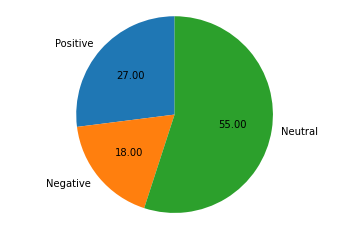

In [125]:
# Creation of a data shart
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

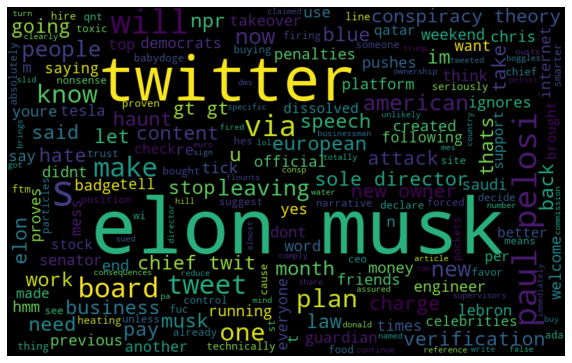

In [126]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()